In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
produccion_anual_cultivos = pd.read_csv("producto_anual_cultivos.csv")
produccion_anual_cultivos

,Año,Región,Cultivo,Área Cosechada (ha),Producción (ton)
0,2015,Cajamarca,Maíz,12000,36000
1,2015,Junín,Papa,15000,45000
2,2015,Cusco,Café,8000,12000
3,2016,Cajamarca,Maíz,13000,39000
4,2016,Junín,Papa,15500,46500
5,2016,Cusco,Café,8500,12750
6,2017,Cajamarca,Maíz,14000,42000
7,2017,Junín,Papa,16000,48000
8,2017,Cusco,Café,9000,13500
9,2018,Cajamarca,Maíz,13500,38000


In [6]:
produccion_arroz_maiz_regiones_selec = pd.read_csv("produccion__mais.csv")
produccion_arroz_maiz_regiones_selec

,Año,Región,Cultivo,Producción (ton),Exportaciones (ton)
0,2015,Piura,Arroz,25000,5000
1,2015,Lambayeque,Arroz,18000,4000
2,2015,Cajamarca,Maíz,36000,5000
3,2016,Piura,Arroz,26000,5500
4,2016,Lambayeque,Arroz,18500,4500
5,2016,Cajamarca,Maíz,39000,6000
6,2017,Piura,Arroz,28000,7000
7,2017,Lambayeque,Arroz,20200,5900
8,2017,Cajamarca,Maíz,42000,7500
9,2018,Piura,Arroz,32000,8200


In [29]:
# grafico linea para produccion de maiz y papa 


mascara_booleana_primera  = produccion_arroz_maiz_regiones_selec["Cultivo"]=="Maíz"
mascara_booleana_segunda = produccion_anual_cultivos["Cultivo"] =="Papa"

partida = pd.merge(produccion_anual_cultivos[mascara_booleana_segunda],produccion_arroz_maiz_regiones_selec[mascara_booleana_primera], how="outer")



partida.fillna(0)
partida.sort_values(by="Año", inplace=True)

partida



#partida2

,Año,Región,Cultivo,Área Cosechada (ha),Producción (ton),Exportaciones (ton)
0,2015,Cajamarca,Maíz,NaN,36000,5000.0
1,2015,Junín,Papa,15000.0,45000,NaN
2,2016,Cajamarca,Maíz,NaN,39000,6000.0
3,2016,Junín,Papa,15500.0,46500,NaN
4,2017,Cajamarca,Maíz,NaN,42000,7500.0
5,2017,Junín,Papa,16000.0,48000,NaN
6,2018,Cajamarca,Maíz,NaN,43200,8200.0
7,2018,Junín,Papa,17000.0,50000,NaN
8,2019,Cajamarca,Maíz,NaN,44100,8150.0
9,2019,Junín,Papa,17500.0,49000,NaN


In [31]:
partida.columns

Index(['Año', 'Región', 'Cultivo', 'Área Cosechada (ha)', 'Producción (ton)',
       'Exportaciones (ton)'],
      dtype='object')

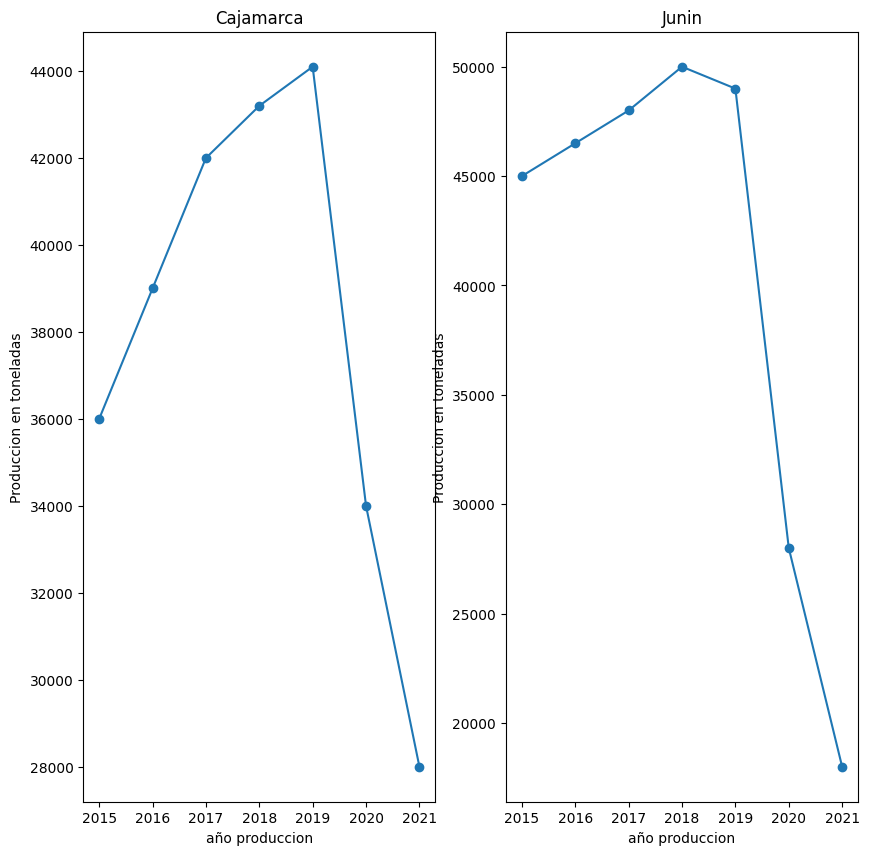

In [82]:
def graficar_de_acuerdo_region():
    fig, axs=  plt.subplots(1,2)
    fig.set_size_inches(h= 10, w=10)
    anos_cultivos = partida.groupby(by=["Región", "Año"]).sum()
    caja = pd.DataFrame(anos_cultivos.loc[["Cajamarca"]]["Producción (ton)"])
    junin = pd.DataFrame(anos_cultivos.loc[["Junín"]]["Producción (ton)"])
    caja.reset_index(drop=True, inplace=True)
    junin.reset_index(drop=True, inplace=True)
    axs[0].plot([valor[1] for valor in anos_cultivos.index.to_list() if valor[0]=='Cajamarca'], caja, marker='o')
    axs[0].set_title("Cajamarca")
    axs[1].set_title("Junin")
    axs[0].set_ylabel("Produccion en toneladas")
    axs[1].set_ylabel("Produccion en toneladas")
    
    axs[0].set_xlabel("año produccion")
    axs[1].set_xlabel("año produccion")
    axs[1].plot([valor[1] for valor in anos_cultivos.index.to_list() if valor[0]=='Junín'], junin, marker='o')

    

graficar_de_acuerdo_region()

In [119]:
# segundo reportes


variacion_estandar_produccion_ton =produccion_arroz_maiz_regiones_selec["Producción (ton)"].std()
promedio_produccion = produccion_arroz_maiz_regiones_selec["Producción (ton)"].mean()

limites = [  promedio_produccion + variacion_estandar_produccion_ton,  # limite superior
           variacion_estandar_produccion_ton-promedio_produccion] # limite inferior


producciones_similares = produccion_arroz_maiz_regiones_selec.where(
    (produccion_arroz_maiz_regiones_selec["Producción (ton)"]<limites[0] ) & (produccion_arroz_maiz_regiones_selec["Producción (ton)"]>=limites[1])
    
    ).dropna()

producciones_similares




,Año,Región,Cultivo,Producción (ton),Exportaciones (ton)
0,2015.0,Piura,Arroz,25000.0,5000.0
1,2015.0,Lambayeque,Arroz,18000.0,4000.0
2,2015.0,Cajamarca,Maíz,36000.0,5000.0
3,2016.0,Piura,Arroz,26000.0,5500.0
4,2016.0,Lambayeque,Arroz,18500.0,4500.0
6,2017.0,Piura,Arroz,28000.0,7000.0
7,2017.0,Lambayeque,Arroz,20200.0,5900.0
9,2018.0,Piura,Arroz,32000.0,8200.0
10,2018.0,Lambayeque,Arroz,23000.0,6400.0
12,2019.0,Piura,Arroz,32100.0,8100.0


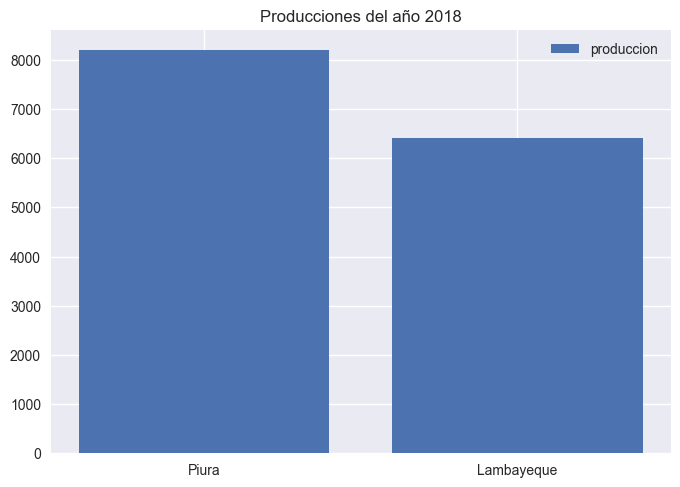

In [156]:
def grafico_barras_exportaciones_de_regiones_produccion_similares(ano_visualizar: int):
    se = producciones_similares[producciones_similares["Año"]==ano_visualizar]
    plt.title(f"Producciones del año {ano_visualizar}")
    plt.bar(se["Región"], se["Exportaciones (ton)"], label="produccion")
    plt.style.use(  'seaborn-v0_8-deep')
    plt.legend(alignment="center")


grafico_barras_exportaciones_de_regiones_produccion_similares(2018)

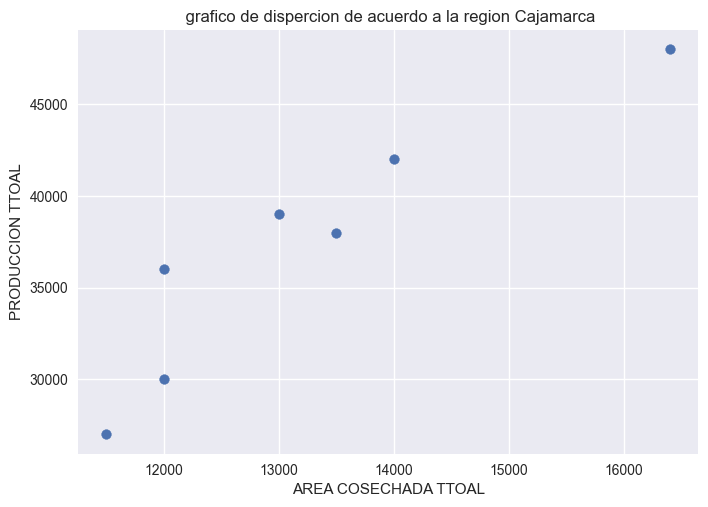

In [172]:
def grafico_dispercion_de_acuerdo_region(region: str):
    partida = produccion_anual_cultivos.where(produccion_anual_cultivos["Región"]==region).dropna()
    plt.scatter(partida["Área Cosechada (ha)"], partida["Producción (ton)"])
    plt.title(F" grafico de dispercion de acuerdo a la region {region}")
    plt.ylabel("PRODUCCION TTOAL")
    plt.xlabel("AREA COSECHADA TTOAL")
    
grafico_dispercion_de_acuerdo_region("Cajamarca")

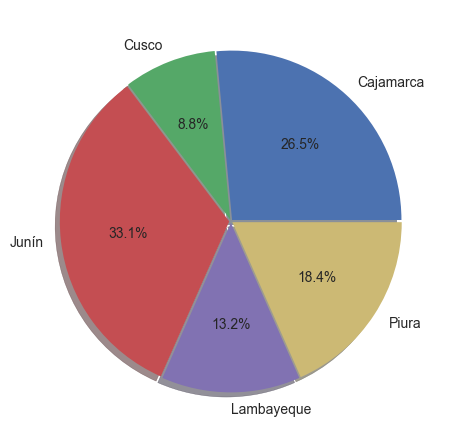

In [182]:
def grafico_pastel_de_acuerdo_producido_en_unraregion(ano: int):
    mergeado =pd.merge(produccion_anual_cultivos, produccion_arroz_maiz_regiones_selec, how="outer")
    mergeado = mergeado[mergeado["Año"] == ano]
    plt.pie(mergeado["Producción (ton)"], labels=mergeado["Región"], autopct="%1.1f%%", explode=(0.01,)*len(mergeado), shadow=True)

grafico_pastel_de_acuerdo_producido_en_unraregion(2015)

In [ ]:
import datetime

class Miembro:
    def __init__(self) -> None:
        self.__DNI
        self.__nombre_completo
        self.__rol  #JP, DEV,QA

class Incidencia:
    def __init__(self) -> None:
        self.__id
        self.__estado  # A / P / L
        self.__tipo = "" # falla de sistema, perfonmance, usabilidad
        self.__fecha_rceacion = datetime.datetime.now()
        self.__tipo_prueba # [pruebas]
        self.__desarrollador_responsable_de_incidencia
        self.__descripcion
        self.__fecha_resolucion_qa  # datatime
        self.__fecha_reasignadcion_desarrollo
        self.__fecha_cierre
        self.__desarrollador_responsable_de_solucion

class Manejador_Incidencias:

    def __init__(self) -> None:
        self.__incidencias = {}

class Proyecto():
    def __init__(self, codigo, nombre, descripcion, nombre_jefe):
        self.__codigo = codigo
        self.__nombre = nombre
        self.__descripcion = descripcion
        self.__nombre_jefe = nombre_jefe
        self.__incidencias =  Manejador_Incidencias()
        # responsable_prueba_qa: incidencia
        self.__tipo_proyecto
        self.__miembros_proyecto = []


    def registar_miembro(self):
        self.__miembros_proyecto.append(Miembro())
    
    def registrar_indicencia(self):
        pass


    

        


_IncompleteInputError: incomplete input (1514671780.py, line 8)